In [58]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("final.csv")

In [3]:
df

Unnamed: 0         Season            Name Transfer Sum             From  \
0              0  Zugänge 20/21   Arthur Cabral  4,40 Mio. €        Palmeiras   
1              1  Zugänge 20/21       Kaly Sene  4,00 Mio. €     Juventus U19   
2              2  Zugänge 20/21   Edon Zhegrova  3,00 Mio. €        KRC Genk    
3              3  Zugänge 20/21   Andrea Padula   450 Tsd. €      FC Wil 1900   
4              4  Zugänge 20/21   Heinz Lindner   ablösefrei  Wehen Wiesbaden   
...          ...            ...             ...          ...              ...   
4365        4365  Abgänge 11/12  Palmiro Di Dio            -        FC Lugano   
4366        4366  Abgänge 11/12  Patrice Feussi            -        FC Lugano   
4367        4367  Abgänge 11/12     Rijat Shala            -        FC Lugano   
4368        4368  Abgänge 11/12  Fabio Liverani            -        FC Lugano   
4369        4369  Abgänge 11/12    Loic Chatton    Leih-Ende        FC Lugano   

      FromCountry FromLanguage FromLanguageFamily             To  \
0          Brazil   Portuguese            Romance  FC Basel 1893   
1           Italy      Italian            Romance  FC Basel 1893   
2         Belgium       French            Romance  FC Basel 1893   
3     Switzerland       German           Germanic  FC Basel 1893   
4         Germany       German           Germanic  FC Basel 1893   
...           ...          ...                ...            ...   
4365  Switzerland      Italian            Romance  FC Lugano U21   
4366  Switzerland      Italian            Romance     Vereinslos   
4367  Switzerland      Italian            Romance     Vereinslos   
4368  Switzerland      Italian            Romance   Karriereende   
4369  Switzerland      Italian            Romance        FC Sion   

         ToCountry    ToLanguage ToLanguageFamily  
0      Switzerland        German         Germanic  
1      Switzerland        German         Germanic  
2      Switzerland        German         Germanic  
3      Switzerland        German         Germanic  
4      Switzerland        German         Germanic  
...            ...           ...              ...  
4365   Switzerland       Italian          Romance  
4366    Vereinslos    Vereinslos       Vereinslos  
4367    Vereinslos    Vereinslos       Vereinslos  
4368  Karriereende  Karriereende     Karriereende  
4369   Switzerland        French          Romance  

[4370 rows x 12 columns]

In [4]:
df_nodes = df[['From','To']]
df_nodes

From             To
0           Palmeiras  FC Basel 1893
1        Juventus U19  FC Basel 1893
2           KRC Genk   FC Basel 1893
3         FC Wil 1900  FC Basel 1893
4     Wehen Wiesbaden  FC Basel 1893
...               ...            ...
4365        FC Lugano  FC Lugano U21
4366        FC Lugano     Vereinslos
4367        FC Lugano     Vereinslos
4368        FC Lugano   Karriereende
4369        FC Lugano        FC Sion

[4370 rows x 2 columns]

In [5]:
ids = []
clubs = []
for i , club in enumerate(pd.concat([df['To'],df['From']]).unique()):
    ids.append(i)
    clubs.append(club)
    
df_club_id_from = pd.DataFrame({'id_From': ids, 'From':clubs})    
df_club_id_to = pd.DataFrame({'id_To': ids, 'To':clubs})    
    


In [6]:
df_temp = pd.merge(df, df_club_id_from , how = 'inner', on='From')

In [7]:
df_temp = pd.merge(df_temp, df_club_id_to , how = 'inner', on='To')

In [8]:
df_temp

Unnamed: 0         Season            Name Transfer Sum  \
0              0  Zugänge 20/21   Arthur Cabral  4,40 Mio. €   
1              1  Zugänge 20/21       Kaly Sene  4,00 Mio. €   
2              2  Zugänge 20/21   Edon Zhegrova  3,00 Mio. €   
3             57  Zugänge 18/19   Edon Zhegrova        Leihe   
4              3  Zugänge 20/21   Andrea Padula   450 Tsd. €   
...          ...            ...             ...          ...   
4365        3113  Abgänge 12/13  Gaël N'Lundulu   ablösefrei   
4366        3117  Abgänge 12/13     Thierno Bah            ?   
4367        3118  Abgänge 12/13   Nélson Borges            ?   
4368        3120  Abgänge 12/13    Aadil Assana    Leih-Ende   
4369        3145  Abgänge 11/12    Rodrigo Tosi   ablösefrei   

                   From  FromCountry FromLanguage FromLanguageFamily  \
0             Palmeiras       Brazil   Portuguese            Romance   
1          Juventus U19        Italy      Italian            Romance   
2             KRC Genk       Belgium       French            Romance   
3             KRC Genk       Belgium       French            Romance   
4           FC Wil 1900  Switzerland       German           Germanic   
...                 ...          ...          ...                ...   
4365  FC Lausanne-Sport  Switzerland       French            Romance   
4366  FC Lausanne-Sport  Switzerland       French            Romance   
4367  FC Lausanne-Sport  Switzerland       French            Romance   
4368  FC Lausanne-Sport  Switzerland       French            Romance   
4369  FC Lausanne-Sport  Switzerland       French            Romance   

                 To     ToCountry     ToLanguage ToLanguageFamily  id_From  \
0     FC Basel 1893   Switzerland         German         Germanic      617   
1     FC Basel 1893   Switzerland         German         Germanic      188   
2     FC Basel 1893   Switzerland         German         Germanic       52   
3     FC Basel 1893   Switzerland         German         Germanic       52   
4     FC Basel 1893   Switzerland         German         Germanic       21   
...             ...           ...            ...              ...      ...   
4365  Chern. Burgas      Bulgaria      Bulgarian           Slavic      459   
4366      Al-Taawon  Saudi Arabia         Arabic          Semitic      459   
4367      FC Prilly   Switzerland         French          Romance      459   
4368      AS Monaco        France         French          Romance      459   
4369        Tractor          Iran  Persian Farsi     Indo-Iranian      459   

      id_To  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
4365    492  
4366    493  
4367    494  
4368    495  
4369    496  

[4370 rows x 14 columns]

In [16]:
df_id = df_temp[['id_From','id_To']]
pd.as_

id_From  id_To
0         617      0
1         188      0
2          52      0
3          52      0
4          21      0
...       ...    ...
4365      459    492
4366      459    493
4367      459    494
4368      459    495
4369      459    496

[4370 rows x 2 columns]

In [10]:
df_id.to_string("final.txt", encoding="utf-8-sig", header = None, index = None )
df_txt = pd.read_

In [ ]:
G = nx.Graph()
G = nx.DiGraph()
G = nx.MultiGraph()
G = nx.MultiDiGraph()

In [15]:
network =  nx.DiGraph()

In [ ]:
network.add_edges_from(elist)

In [ ]:
network = G.add_edges_from(elist)

In [ ]:
from_pandas_edgelist(df, source='source', target='target', edge_attr=None, create_using=None, edge_key=None)

In [66]:
g = nx.from_pandas_edgelist(df_temp, 
                            source = 'id_From',
                            target = 'id_To',
                            edge_attr = None,
                            create_using = nx.Graph())


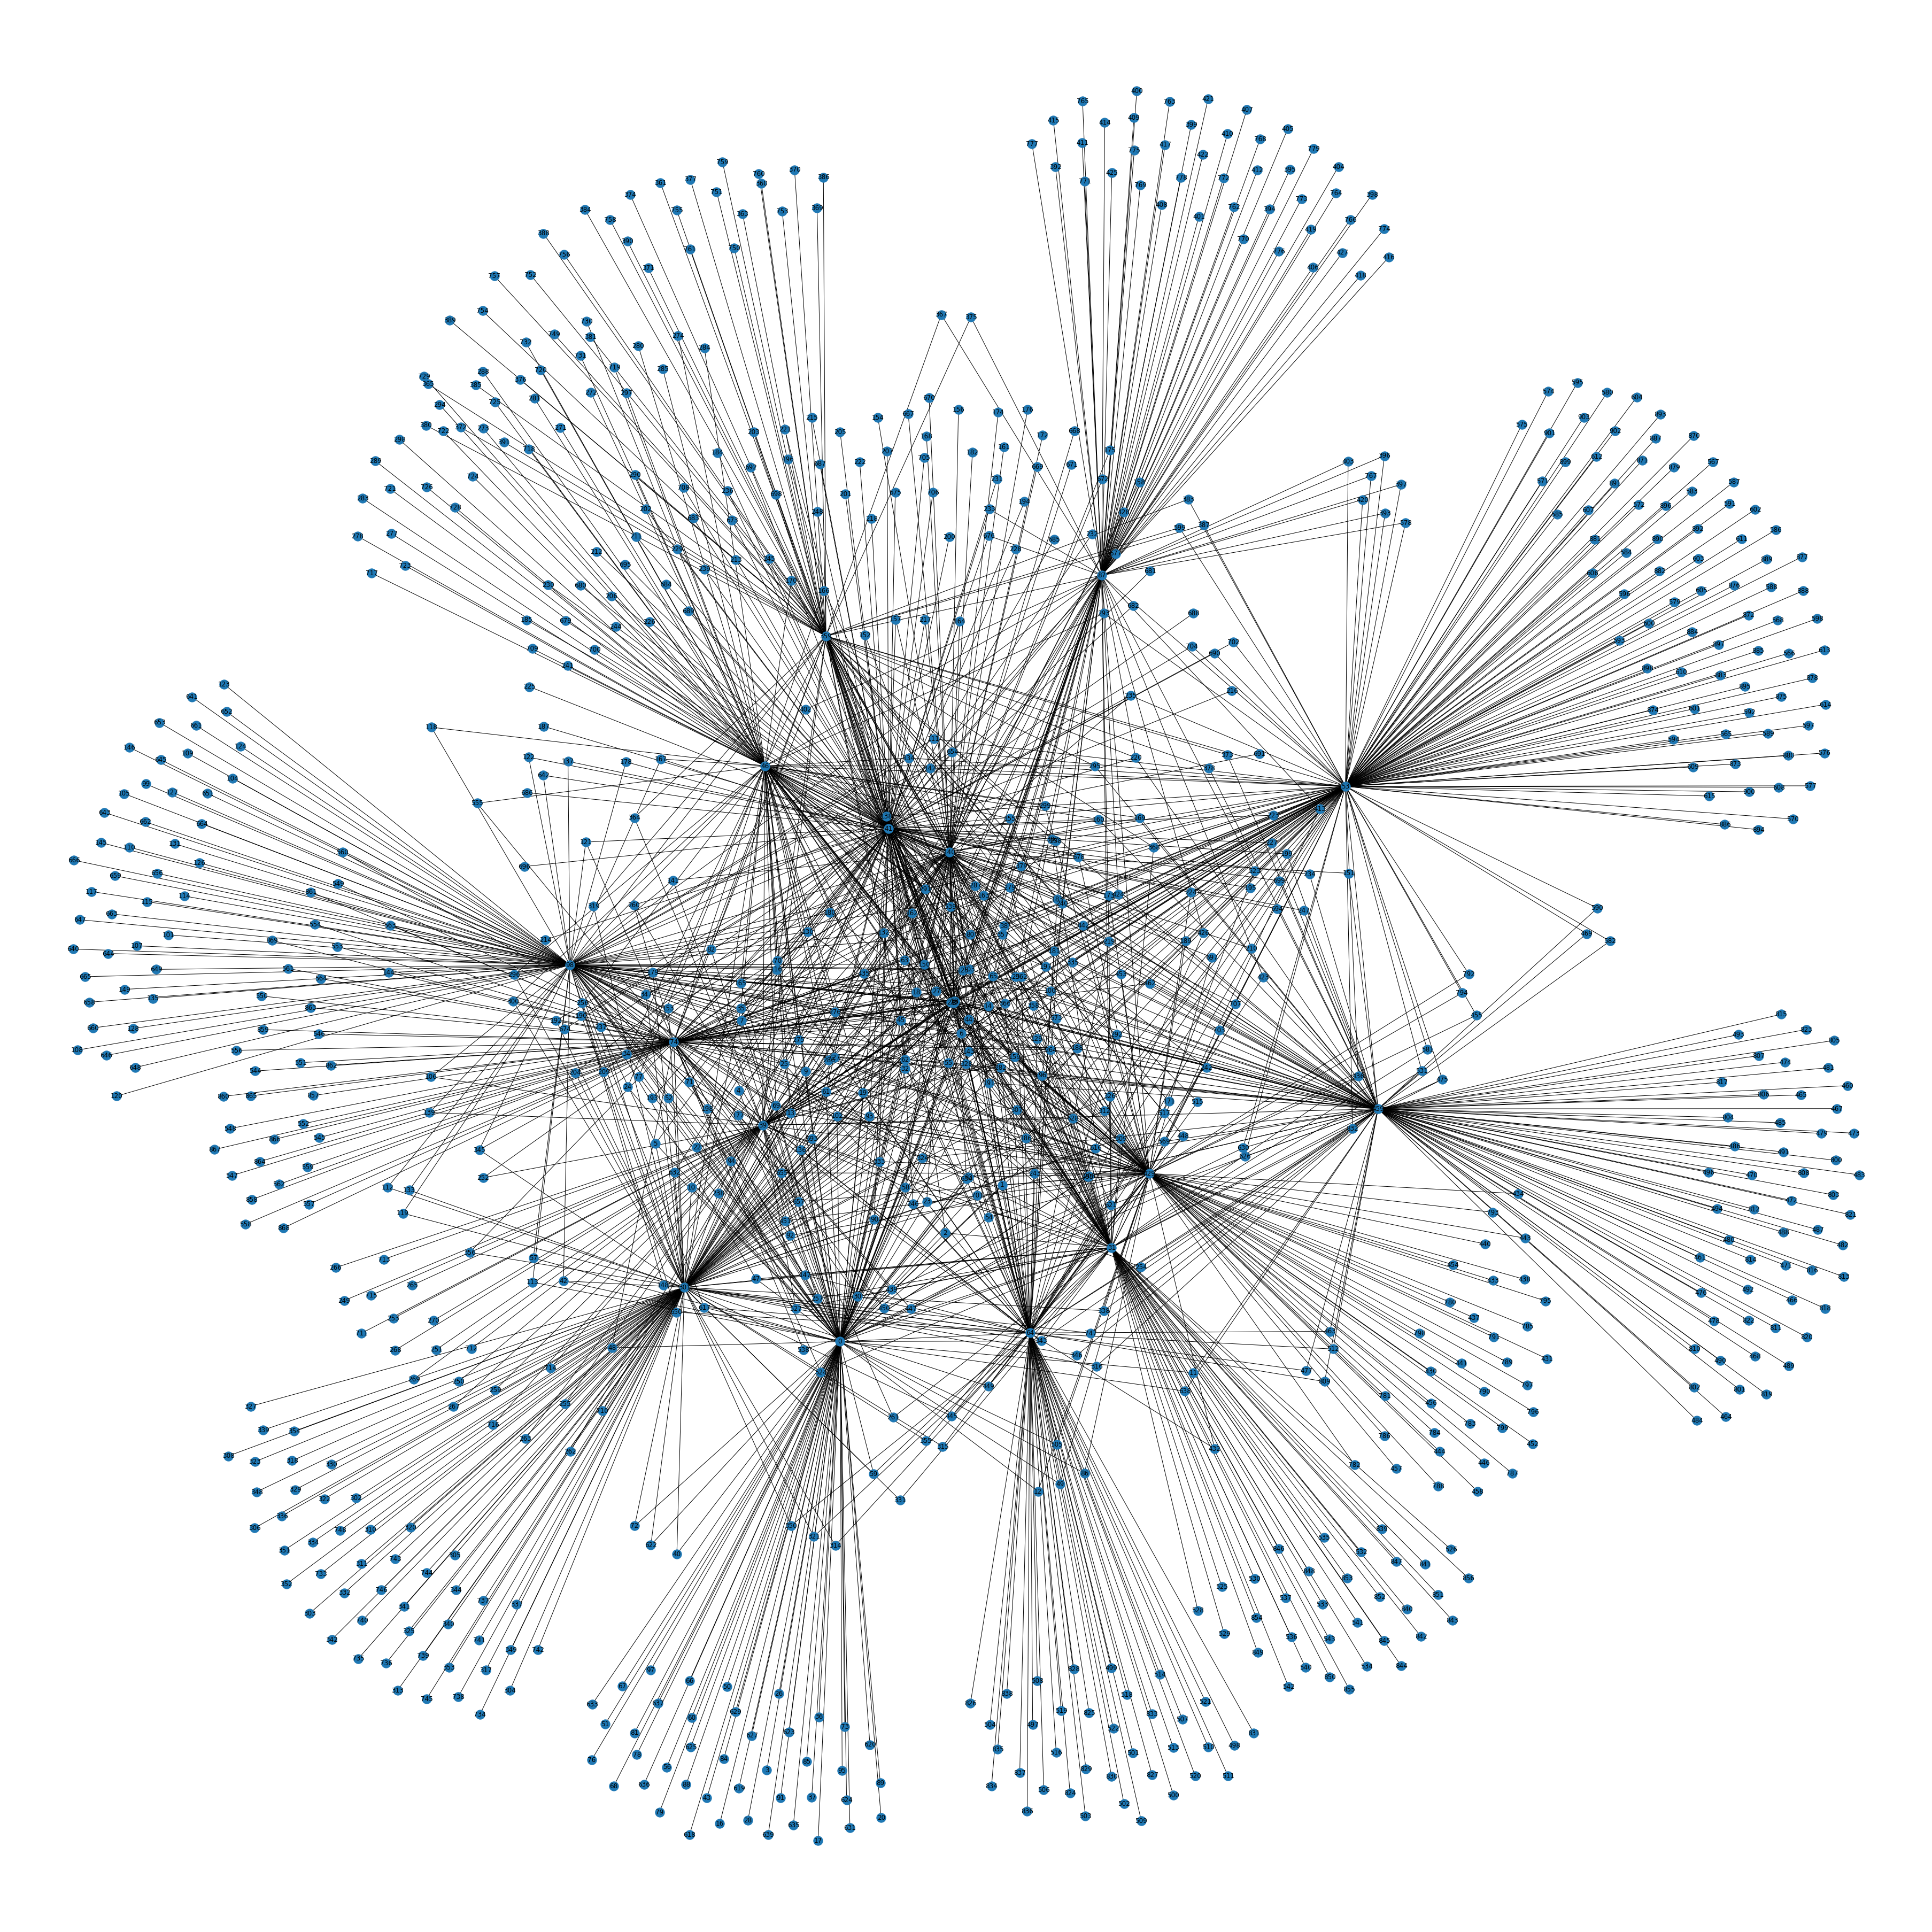

In [67]:
fig = plt.figure(figsize=(50, 50)) 
g = nx.from_pandas_edgelist(df_temp, 
                            source = 'id_From',
                            target = 'id_To',
                            edge_attr = True,
                            create_using = nx.Graph())
nx.draw(g, with_labels = True) 
plt.axis('equal') 
plt.show() 

(-1.0931331723928452,
 0.9557966202497482,
 -1.066841933131218,
 0.9987534612417222)

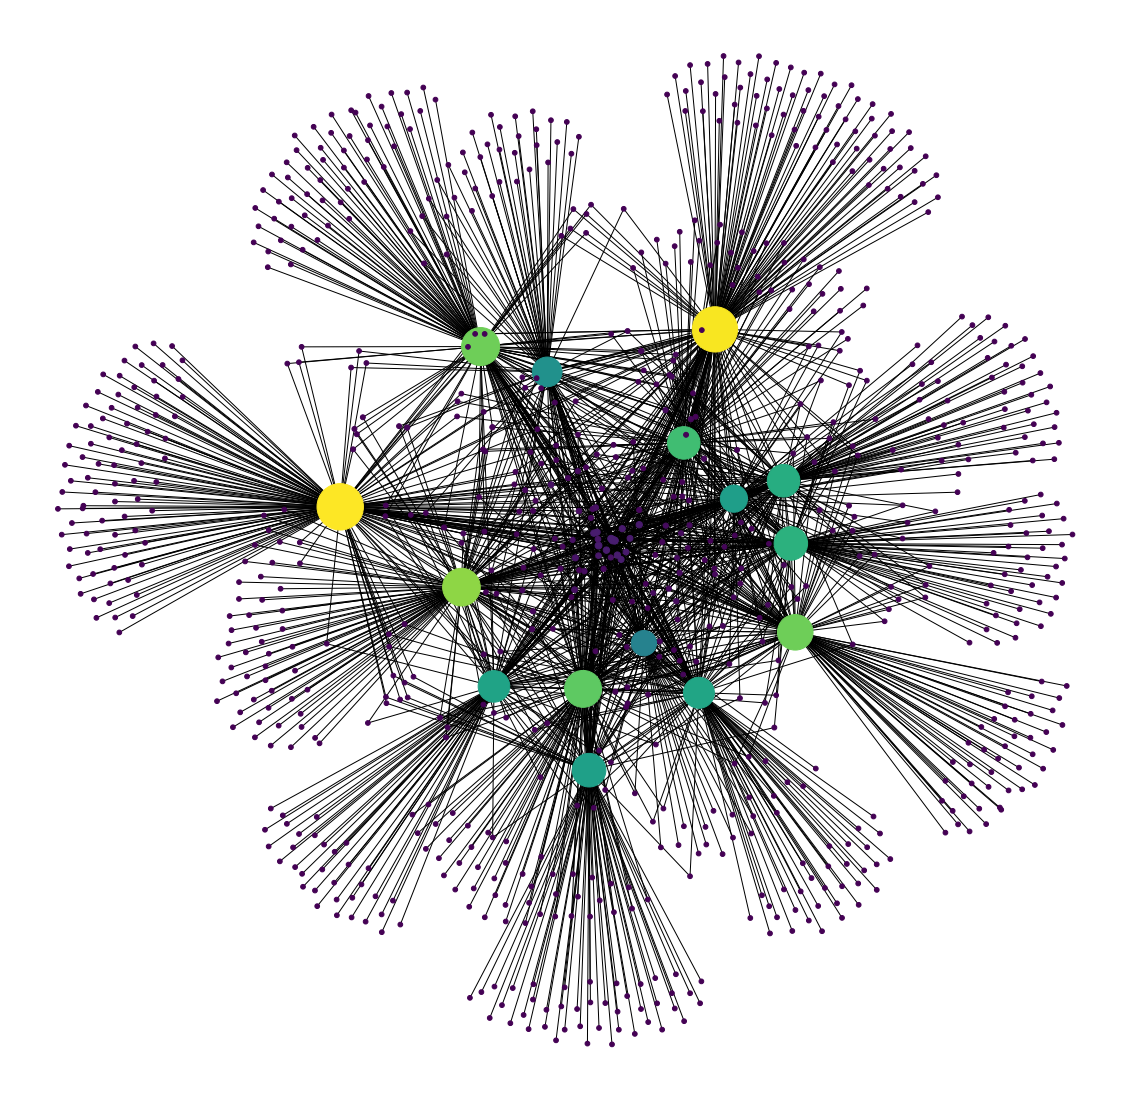

In [59]:
pos = nx.spring_layout(g)

betCent = nx.betweenness_centrality(g, normalized=True, endpoints=True)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize = (20,20))
nx.draw_networkx(g, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [49]:
 print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 904
Number of edges: 1700
Average degree:   3.7611
